In [1]:
import os
os. getcwd()

'/Users/hanatihailati/Downloads'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
%matplotlib inline
from datetime import datetime
import baostock as bs

In [3]:
df = pd.read_excel (r'/Users/hanatihailati/Downloads/Python Book/Carbon time series analysis.xlsx', 
                    sheet_name='Sheet1', index_col = 0, parse_dates = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 645 entries, 2022-03-27 to 2009-10-18
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Carbon Emissions Futures   645 non-null    float64
 1   Brent Oil Futures          645 non-null    float64
 2   Natural Gas Futures        645 non-null    float64
 3   DJ Commodity Energy Index  404 non-null    float64
 4   SPX                        645 non-null    float64
 5   Euro Stoxx 50              645 non-null    float64
dtypes: float64(6)
memory usage: 35.3 KB


In [5]:
df.describe()

,Carbon Emissions Futures,Brent Oil Futures,Natural Gas Futures,DJ Commodity Energy Index,SPX,Euro Stoxx 50
count,645.000000,645.000000,645.000000,404.000000,645.000000,645.000000
mean,17.471070,76.689891,3.283989,89.215173,2295.916636,3166.426264
std,16.670466,25.745369,0.913554,23.827405,939.515052,483.087013
min,3.920000,21.440000,1.495000,34.717600,1022.580000,2026.030000
25%,6.750000,55.620000,2.650000,72.899425,1465.770000,2833.060000
50%,11.100000,72.610000,3.044000,86.444550,2091.580000,3164.210000
75%,22.180000,105.020000,3.931000,101.189725,2830.710000,3495.190000
max,96.430000,126.650000,6.135000,187.466800,4766.180000,4370.330000


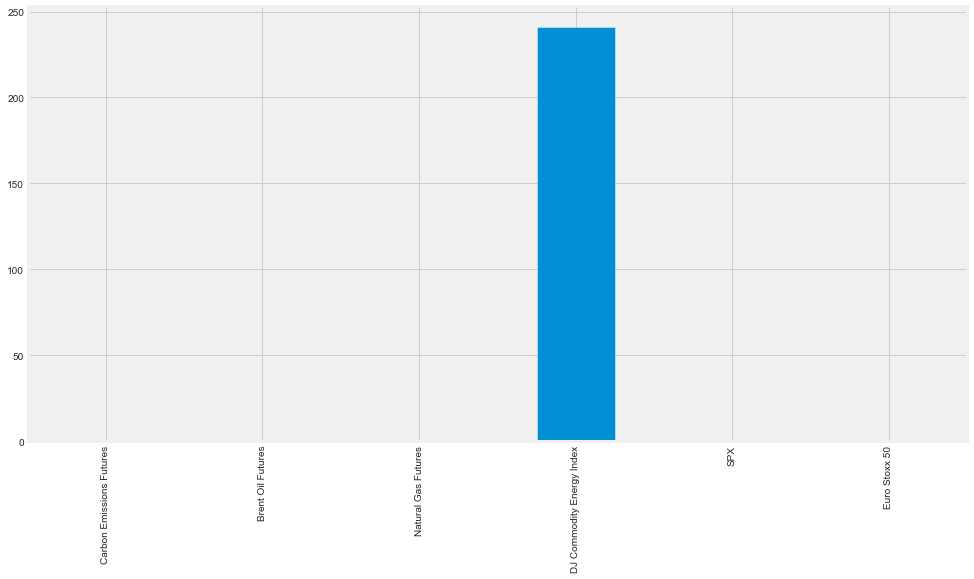

In [6]:
# df_missing_count
df_missing_count = df.isnull().sum()
plt.rcParams['figure.figsize'] = (15, 8)
df_missing_count.plot.bar()
plt.show()

In [7]:
# shift(1).rolling(window = 3) moving average
df['Carbon 3D MA'] = df['Carbon Emissions Futures'].shift(1).rolling(window = 3).mean()
df['Carbon 10D MA'] = df['Carbon Emissions Futures'].shift(1).rolling(window = 10).mean()
df['Carbon 30D MA'] = df['Carbon Emissions Futures'].shift(1).rolling(window = 30).mean()

In [8]:
# pct_change() absolute price change
df['Carbon dailyreturn'] = df['Carbon Emissions Futures'].pct_change()
df['SPX dailyreturn'] = df['SPX'].pct_change()
df['Oil dailyreturn'] = df['Brent Oil Futures'].pct_change()
df['EuroStoxx dailyreturn'] = df['Euro Stoxx 50'].pct_change()
df['Natural Gas dailyreturn'] = df['Natural Gas Futures'].pct_change()
df['Energy Index dailyreturn'] = df['DJ Commodity Energy Index'].pct_change()

In [7]:
dailyreturn = df.pct_change()

In [8]:
dailyreturn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 645 entries, 2022-03-27 to 2009-10-18
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Carbon Emissions Futures   644 non-null    float64
 1   Brent Oil Futures          644 non-null    float64
 2   Natural Gas Futures        644 non-null    float64
 3   DJ Commodity Energy Index  644 non-null    float64
 4   SPX                        644 non-null    float64
 5   Euro Stoxx 50              644 non-null    float64
dtypes: float64(6)
memory usage: 35.3 KB


In [9]:
logreturn = np.log(df / df.shift(1))
logreturn.dropna(inplace = True)

<AxesSubplot:xlabel='Date'>

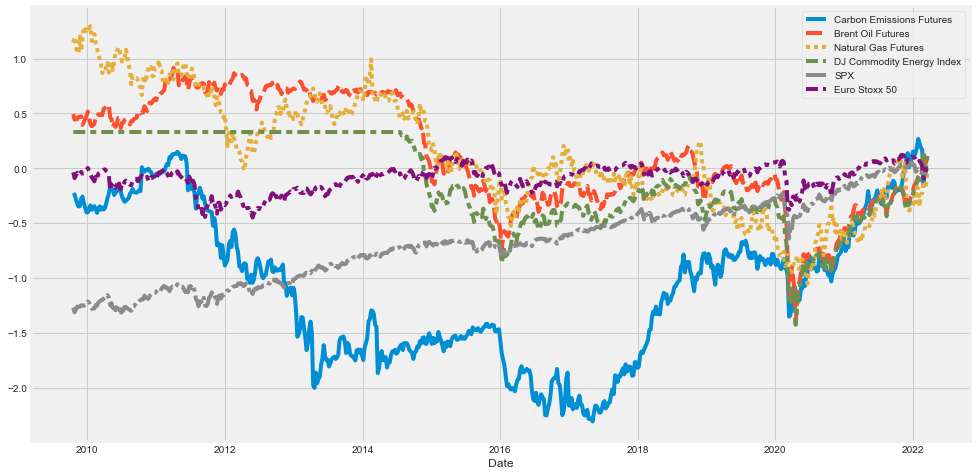

In [10]:
# sns.lineplot()multi securities prive move
sns.lineplot(data = dailyreturn.cumsum())

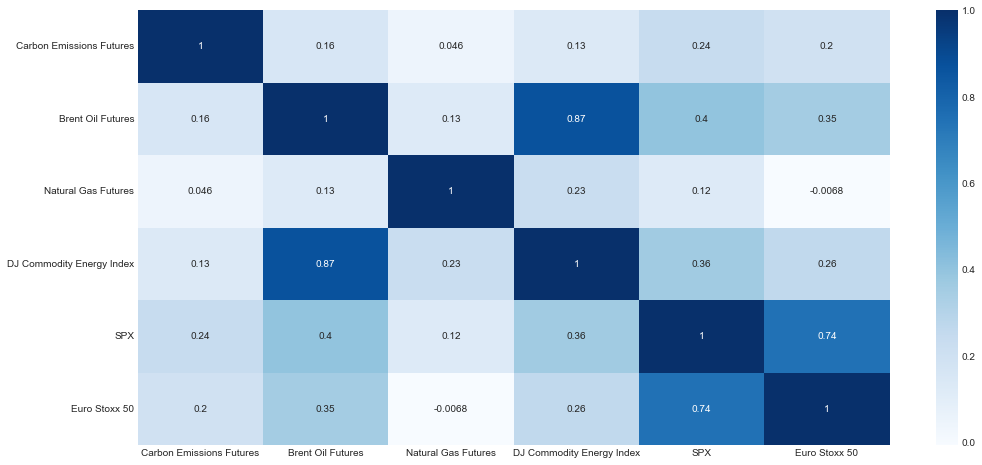

In [11]:
# heatmap.corr()security correlation matrix method 1 (straight forward)
sns.heatmap(dailyreturn.corr(), 
            annot=True, cmap='Blues')
plt.savefig('Correlation.png')

<AxesSubplot:>

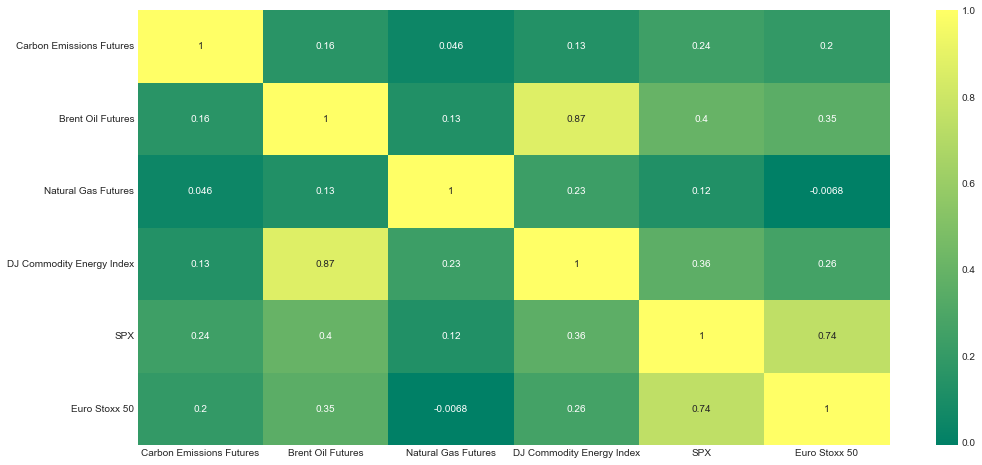

In [12]:
# heatmap.corr()security correlation matrix method 2 (with amendable attributions)
cmap = sns.diverging_palette( 220, 10, as_cmap= True)
sns.heatmap(dailyreturn.iloc[:df.shape[0]].corr(),annot = True, cmap = 'summer')

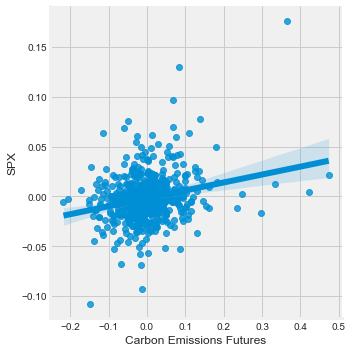

In [13]:
# sns.lmplot()ploting 2 securities for correlation with confidence interval, method 1 (straight forward)
sns.lmplot( x = 'Carbon Emissions Futures', y = 'SPX', data = dailyreturn)

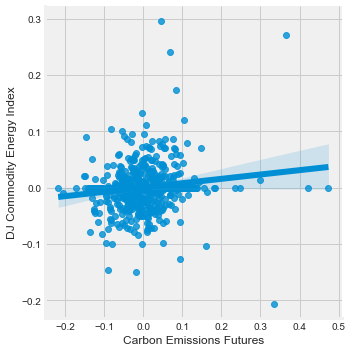

In [14]:
sns.lmplot( x = 'Carbon Emissions Futures', y = 'DJ Commodity Energy Index', data = dailyreturn)

<AxesSubplot:xlabel='Carbon Emissions Futures', ylabel='DJ Commodity Energy Index'>

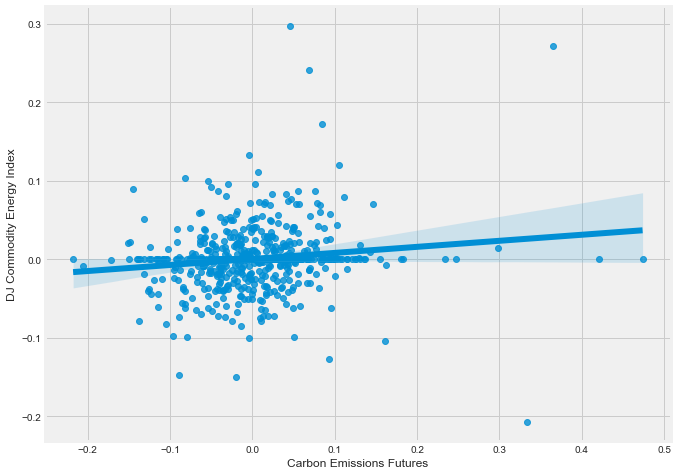

In [15]:
# sns.regplt()ploting 2 securities for correlation with confidence interval, method 2 (with amendable attributions)
f, ax = plt.subplots(figsize = (10, 8))
sns.regplot(x = 'Carbon Emissions Futures', y = 'DJ Commodity Energy Index', data = dailyreturn,
           fit_reg=True, # True，for adding correlation fitted line for x & y
           ci = 95, # setting confidence interval a
           scatter = True, # Ture, for scattered plot
           ax=ax)

<AxesSubplot:xlabel='Carbon Emissions Futures', ylabel='DJ Commodity Energy Index'>

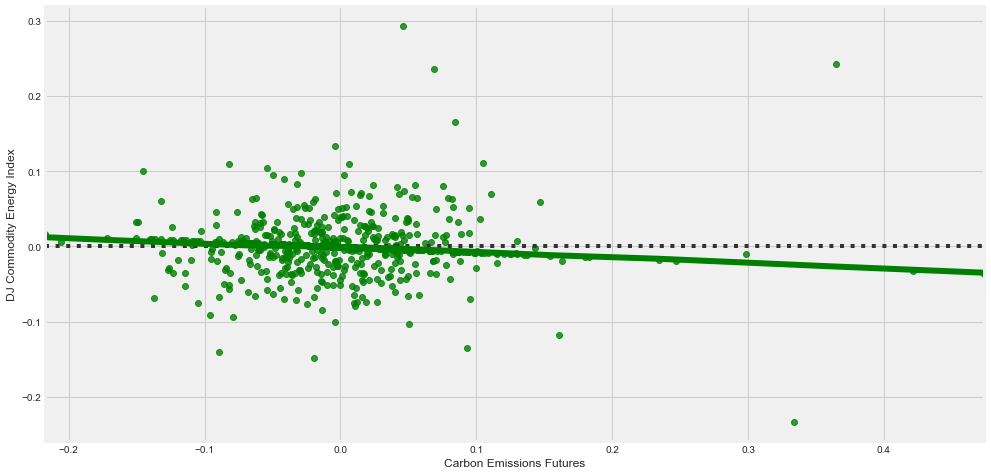

In [16]:
# sns.residplot()residue plot, for fitness check of regression
x = dailyreturn['Carbon Emissions Futures']
y = dailyreturn['DJ Commodity Energy Index'] 
sns.residplot(x = x, y = y, lowess = True, color = 'g')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


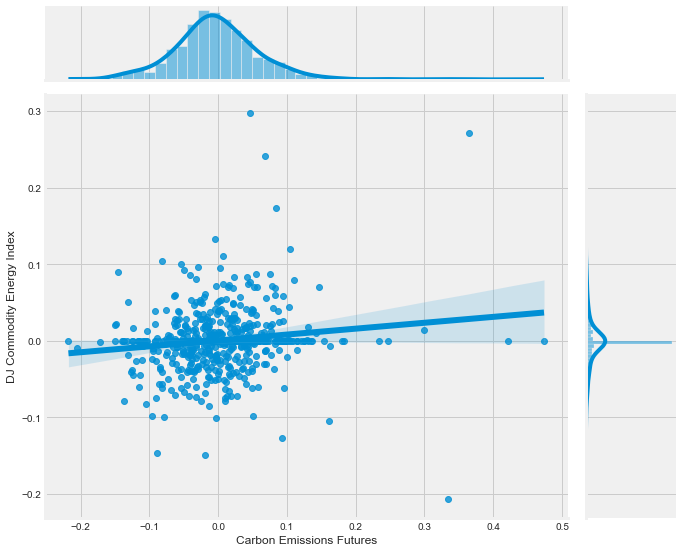

In [17]:
# sns.jointplot()for two securities correlations with fitted line, CI, scatter plots

# sns.jointplot
gird = sns.jointplot('Carbon Emissions Futures', 'DJ Commodity Energy Index', data = dailyreturn, kind = 'reg')
gird.fig.set_figwidth(10)
gird.fig.set_figheight(8)

# kind="reg" or kind="scatter"

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

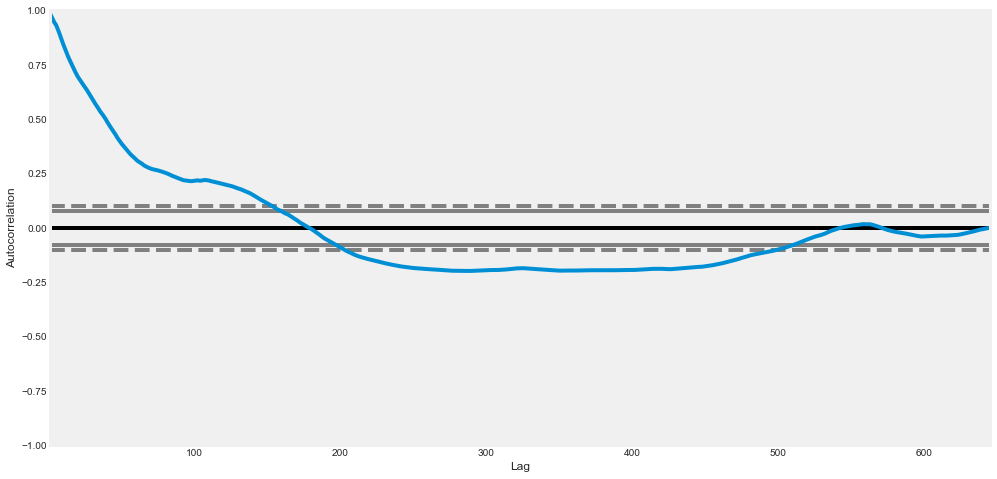

In [18]:
# autocorrelation for time series analysis
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Carbon Emissions Futures'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


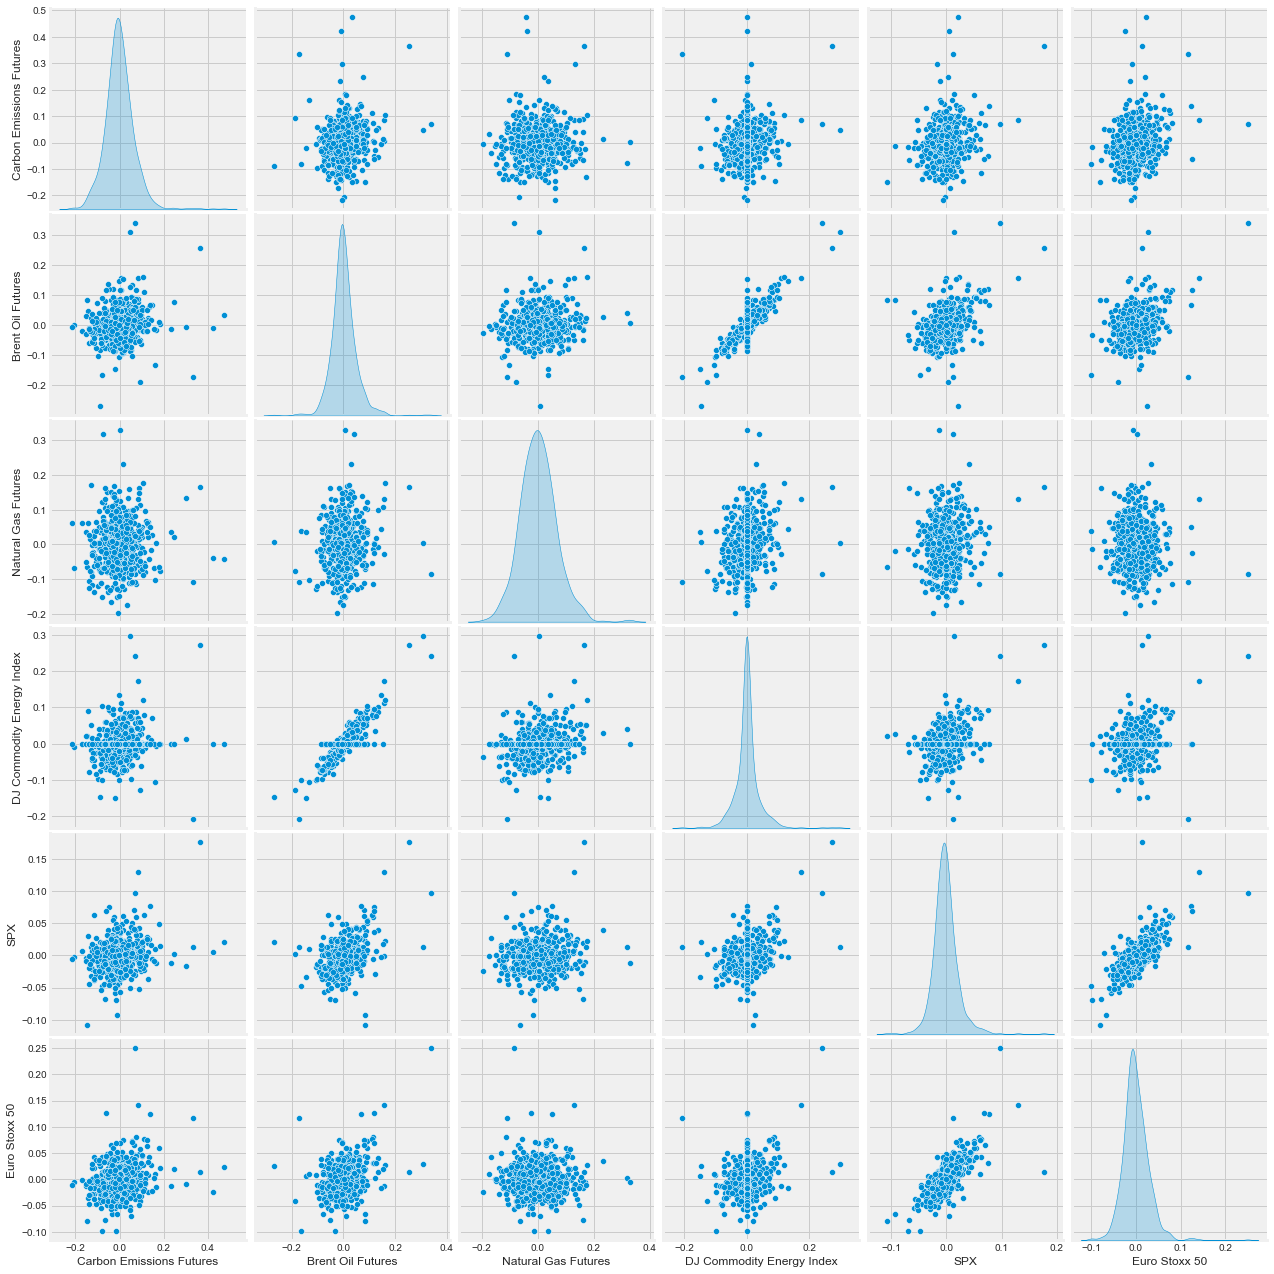

In [19]:
# sns.pairplot()for multi securities plotting
sns.pairplot(dailyreturn, size = 3, diag_kind = 'kde')

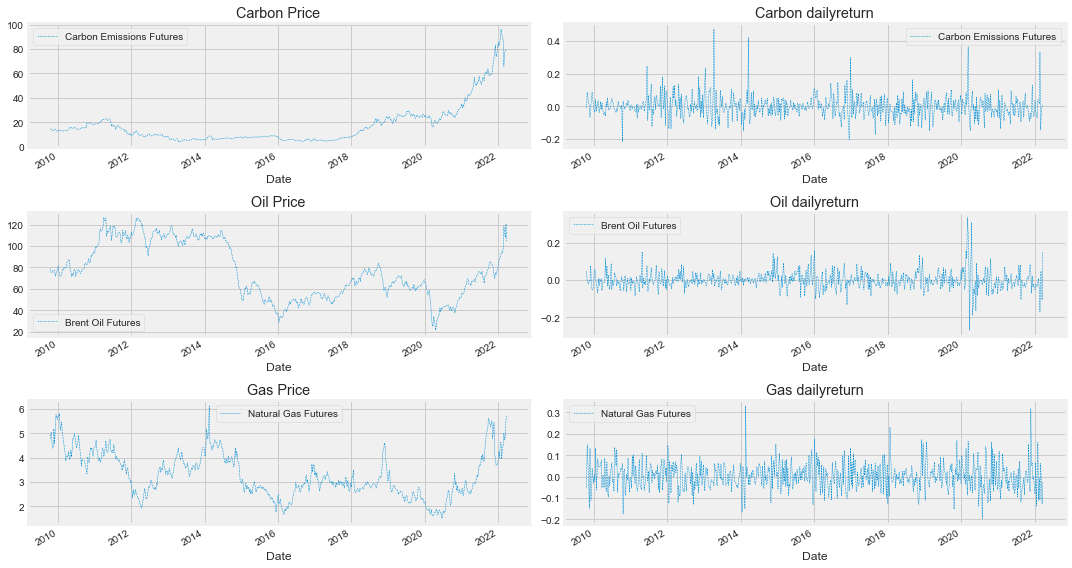

In [25]:
fig, axes = plt.subplots(nrows = 3, ncols = 2)
fig.set_figheight(8)
fig.set_figwidth(15)

df['Carbon Emissions Futures'].plot(ax = axes[0,0], legend = True, linestyle = '--', linewidth=0.5)
axes[0,0].set_title('Carbon Price')

dailyreturn['Carbon Emissions Futures'].plot(ax = axes[0,1], legend = True, linestyle = '--', linewidth=0.5)
axes[0,1].set_title('Carbon dailyreturn')

df['Brent Oil Futures'].plot(ax = axes[1,0], legend = True, linestyle = '--', linewidth=0.5)
axes[1,0].set_title('Oil Price')

dailyreturn['Brent Oil Futures'].plot(ax = axes[1,1], legend = True, linestyle = '--', linewidth=0.5)
axes[1,1].set_title('Oil dailyreturn')

df['Natural Gas Futures'].plot(ax = axes[2,0], legend = True, linestyle = '--', linewidth=0.5)
axes[2,0].set_title('Gas Price')

dailyreturn['Natural Gas Futures'].plot(ax = axes[2,1], legend = True, linestyle = '--', linewidth=0.5)
axes[2,1].set_title('Gas dailyreturn')

fig.tight_layout()

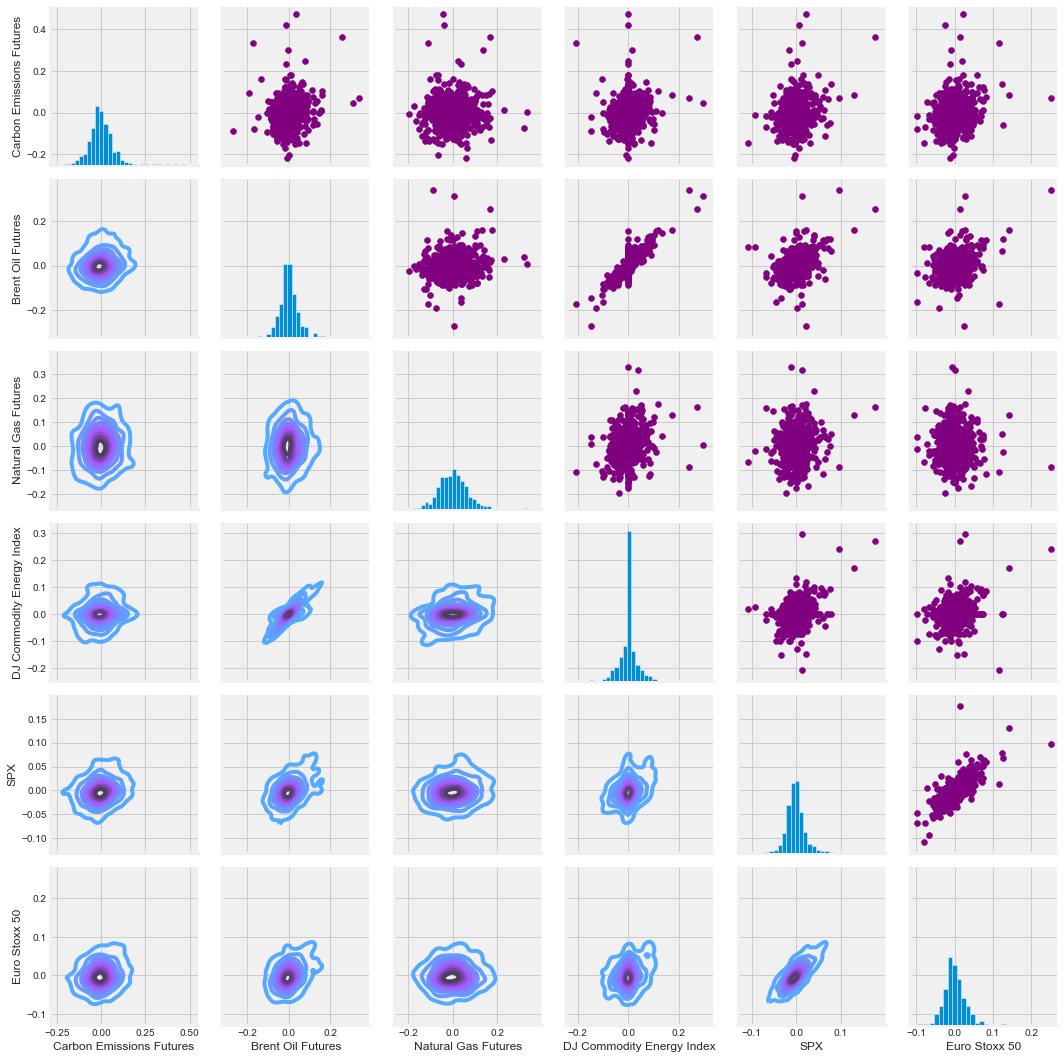

In [26]:
# sns.PairGrid for multi securities ploting multi charts
return_fig = sns.PairGrid(dailyreturn.dropna())
return_fig.map_upper(plt.scatter, color = 'purple')
return_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
return_fig.map_diag(plt.hist, bins = 30)
return_fig.savefig('Carbon Correlation.png')

In [27]:
from datetime import datetime

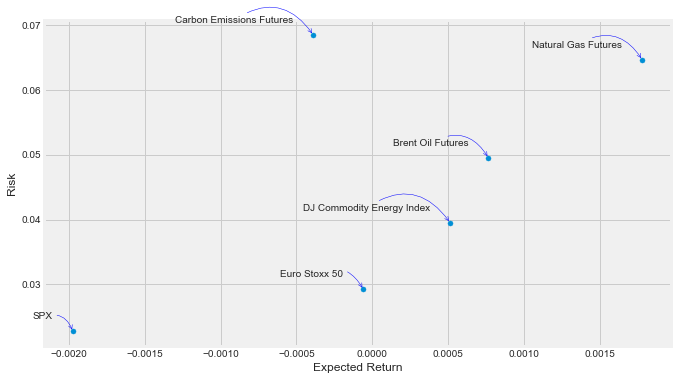

In [28]:
# Sharp Ratio, compare expected return (mean of dailyreturn) with the risk (standard deviation of dailyreturn)
plt.figure(figsize = (10, 6))
plt.scatter(dailyreturn.mean(), dailyreturn.std(), s = 25)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip (dailyreturn.columns, dailyreturn.mean(), dailyreturn.std()):
    plt.annotate(label, xy = (x, y), xytext = (-20, 10), textcoords = 'offset points', ha = 'right', 
                 va = 'bottom', arrowprops = dict(arrowstyle = '->', color = 'b',
                                                  connectionstyle = 'arc3, rad = -0.5'))

<AxesSubplot:>

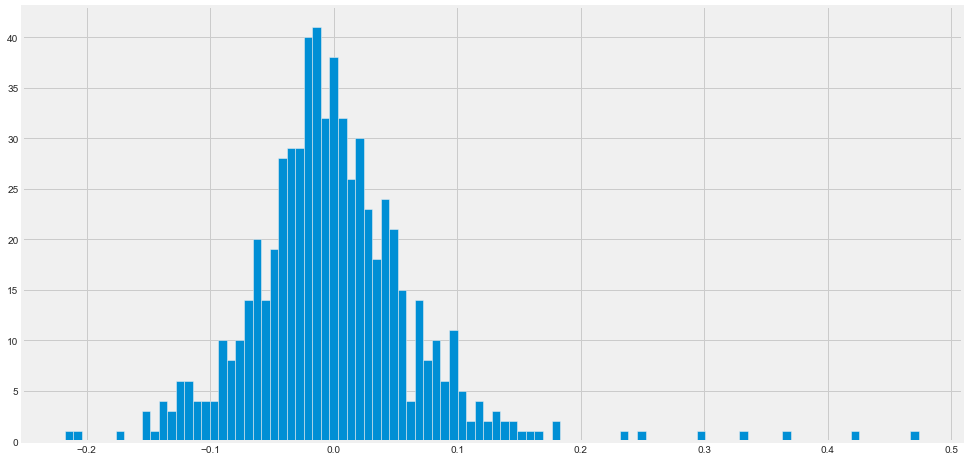

In [29]:
# VaR
# method 1: using hostorical data, emperical bootstrap
dailyreturn['Carbon Emissions Futures'].hist(bins = 100)

In [30]:
dailyreturn['Carbon Emissions Futures'].quantile(0.01)

-0.14313341811270192

In [31]:
# method 2: using Monte Carlo Simulation
days = 365
dt = 1 / 365
mu = dailyreturn['Carbon Emissions Futures'].mean()
sigma = dailyreturn['Carbon Emissions Futures'].std()

In [32]:
def simulate (start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu*dt, scale = sigma* np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * drift[x] + shock[x])
    return price

In [33]:
df.head()

,Carbon Emissions Futures,Brent Oil Futures,Natural Gas Futures,DJ Commodity Energy Index,SPX,Euro Stoxx 50
Date,,,,,,
2022-03-27,78.30,104.39,5.720,168.7354,4545.86,3918.68
2022-03-20,78.80,120.65,5.571,187.4668,4543.04,3867.73
2022-03-13,78.50,107.93,4.863,168.6859,4463.09,3902.44
2022-03-06,76.98,112.67,4.725,171.9209,4204.31,3686.78
2022-02-27,65.80,118.11,5.016,187.3968,4328.87,3556.01


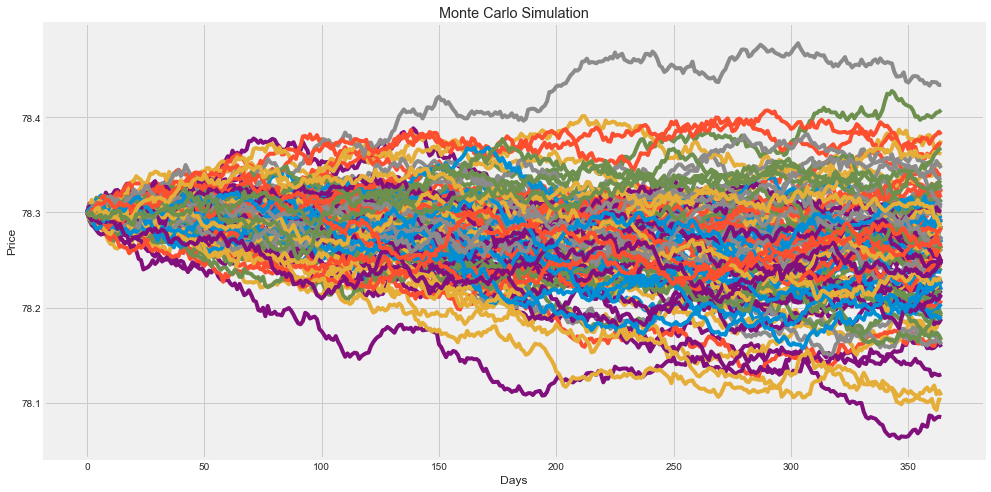

In [34]:
start_price = 78.30

for run in range(100):
    plt.plot(simulate(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation')
plt.savefig('Monte Carlo Simulation')

In [35]:
runs = 1000
simulation = np.zeros(runs)
for run in range(runs):
    simulation [run] = simulate(start_price, days, mu, sigma)[days-1]

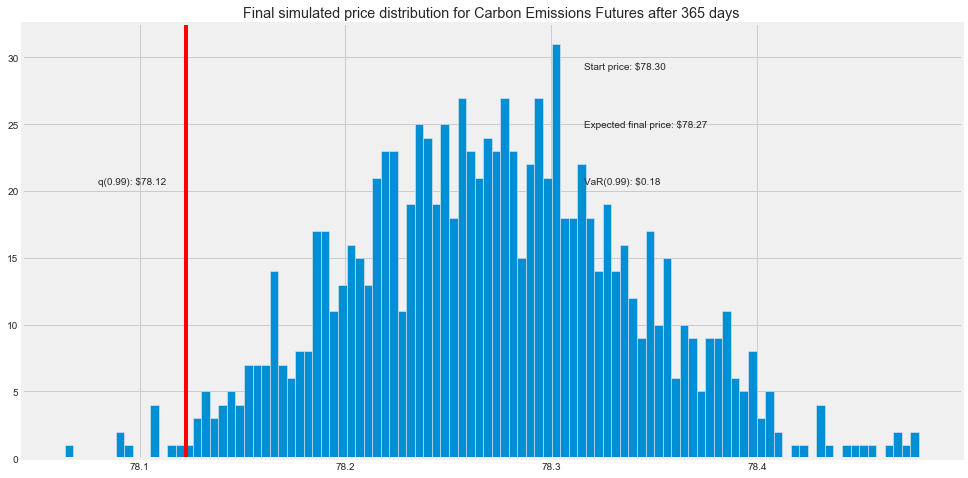

In [36]:
q = np.percentile(simulation,1)

plt.hist(simulation,bins=100)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Expected final price: $%.2f" % simulation.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final simulated price distribution for Carbon Emissions Futures after %s days" %days, weight='bold')

plt.savefig('Carbon Price Forecast.png')